<h1><center>Tencent People Analytics Summer Intern Task</center></h1>
<h3><center>Random Forest Feature Importance for Employee Turnover Data</center></h3>
<h4><center>Candidate: Peiyu Xu (MS in Marketing Analytics at University of Maryland)</center></h4>

<h1> Table of Contents </h1>
    
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Preparation">Preparation</a></li>         
        <li><a href="#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
            <ol>
                <li><a href="#Correlation">Correlation</a></li>
                <li><a href="#Turnover(left) by Satisfaction_level">Turnover(left) by Satisfaction_level</a></li>
            </ol>
         <li><a href="#Random Forest Feature Importance">Random Forest Feature Importance</a></li>
    </ol>
</div>
<br>
<hr>

## Preparation

In [1]:
# load packages
import pandas as pd
import numpy as np

In [2]:
# read file
turnover=pd.read_csv(r"E:\Tencent\original data\turnover.csv")
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.72,0.99,3.0,143.0,4.0,0.0,0.0,0.0,sales,low
1,0.62,0.87,6.0,169.0,2.0,1.0,0.0,0.0,sales,medium
2,0.84,0.99,4.0,262.0,6.0,0.0,1.0,0.0,accounting,medium
3,0.21,0.76,6.0,219.0,4.0,1.0,0.0,0.0,sales,medium
4,0.52,0.38,2.0,103.0,3.0,0.0,0.0,0.0,support,medium


In [3]:
# data dimension
print("This data has",turnover.shape[0],"observations and",turnover.shape[1],"variables")

This data has 14999 observations and 10 variables


In [4]:
# check data types
turnover.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
left                     float64
promotion_last_5years    float64
sales                     object
salary                    object
dtype: object

## Exploratory Data Analysis

In [5]:
# check missing values for each variable
missing_data = turnover.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

satisfaction_level
False    13599
True      1400
Name: satisfaction_level, dtype: int64

last_evaluation
False    14988
True        11
Name: last_evaluation, dtype: int64

number_project
False    14998
True         1
Name: number_project, dtype: int64

average_montly_hours
False    14996
True         3
Name: average_montly_hours, dtype: int64

time_spend_company
False    14998
True         1
Name: time_spend_company, dtype: int64

Work_accident
False    14996
True         3
Name: Work_accident, dtype: int64

left
False    14998
True         1
Name: left, dtype: int64

promotion_last_5years
False    14998
True         1
Name: promotion_last_5years, dtype: int64

sales
False    14998
True         1
Name: sales, dtype: int64

salary
False    14998
True         1
Name: salary, dtype: int64



In [6]:
# drop rows that have missing value(s)
print ("Shape of dataset before cleaning: ", turnover.size)
df = turnover.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head(5)

Shape of dataset before cleaning:  149990
Shape of dataset after cleaning:  135810


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.72,0.99,3.0,143.0,4.0,0.0,0.0,0.0,sales,low
1,0.62,0.87,6.0,169.0,2.0,1.0,0.0,0.0,sales,medium
2,0.84,0.99,4.0,262.0,6.0,0.0,1.0,0.0,accounting,medium
3,0.21,0.76,6.0,219.0,4.0,1.0,0.0,0.0,sales,medium
4,0.52,0.38,2.0,103.0,3.0,0.0,0.0,0.0,support,medium


In [7]:
# frequency table of categorical variables
df['sales'].value_counts()

sales          3744
technical      2447
support        2011
IT             1118
product_mng     826
marketing       785
RandD           716
accounting      698
hr              672
management      564
Name: sales, dtype: int64

In [8]:
df['salary'].value_counts()

low       6603
medium    5860
high      1118
Name: salary, dtype: int64

In [9]:
# one-hot coding for categorical variables
sales_dummy=pd.get_dummies(df['sales'],prefix='sales')
salary_dummy=pd.get_dummies(df['salary'],prefix='salary')
df.drop(['sales','salary'],axis=1,inplace=True)
df=pd.concat([df, sales_dummy, salary_dummy],axis=1)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

## Correlation

In [10]:
# check pearson correlation
corr=df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.100798,-0.146077,-0.021018,-0.101603,0.058720,-0.388476,0.024752,0.004459,0.005249,...,-0.011778,0.005211,0.003181,0.009691,0.004837,0.007233,-0.006639,0.028223,-0.046909,0.031675
last_evaluation,0.100798,1.000000,0.349629,0.343892,0.134800,-0.004997,0.010772,-0.010454,0.002231,-0.008462,...,-0.005887,0.011526,-0.000924,-0.007082,-0.022885,0.013101,0.017824,-0.022107,0.007231,0.004971
number_project,-0.146077,0.349629,1.000000,0.418037,0.194738,-0.006783,0.030197,-0.007437,0.003352,0.005067,...,-0.026562,0.009478,-0.023207,0.001790,-0.013965,-0.002099,0.033783,-0.009461,-0.003539,0.008821
average_montly_hours,-0.021018,0.343892,0.418037,1.000000,0.130419,-0.011142,0.074083,-0.004245,0.003868,-0.005071,...,-0.011277,-0.000907,-0.008000,-0.004866,-0.004578,0.000742,0.018660,-0.006316,-0.000013,0.003518
time_spend_company,-0.101603,0.134800,0.194738,0.130419,1.000000,0.001769,0.145967,0.064870,-0.005622,-0.025222,...,-0.020677,0.117608,0.014647,-0.006438,0.014113,-0.028302,-0.027820,0.035809,-0.042422,0.022938
Work_accident,0.058720,-0.004997,-0.006783,-0.011142,0.001769,1.000000,-0.154664,0.045363,-0.006329,0.015375,...,-0.019706,0.013842,0.013920,0.000512,-0.005994,0.008104,-0.003721,0.010489,-0.006146,0.000381
left,-0.388476,0.010772,0.030197,0.074083,0.145967,-0.154664,1.000000,-0.062547,-0.007809,-0.044892,...,0.030701,-0.045008,0.001222,-0.010198,0.007052,0.012477,0.013105,-0.117994,0.136943,-0.072714
promotion_last_5years,0.024752,-0.010454,-0.007437,-0.004245,0.064870,0.045363,-0.062547,1.000000,-0.040197,0.020474,...,-0.005088,0.128838,0.051573,-0.037324,0.012803,-0.032270,-0.035401,0.075484,-0.083163,0.042033
sales_IT,0.004459,0.002231,0.003352,0.003868,-0.005622,-0.006329,-0.007809,-0.040197,1.000000,-0.070658,...,-0.068336,-0.062344,-0.074183,-0.076218,-0.184776,-0.124867,-0.140411,-0.013680,0.003449,0.004111
sales_RandD,0.005249,-0.008462,0.005067,-0.005071,-0.025222,0.015375,-0.044892,0.020474,-0.070658,1.000000,...,-0.053826,-0.049106,-0.058432,-0.060035,-0.145542,-0.098354,-0.110597,-0.015514,-0.014579,0.023321


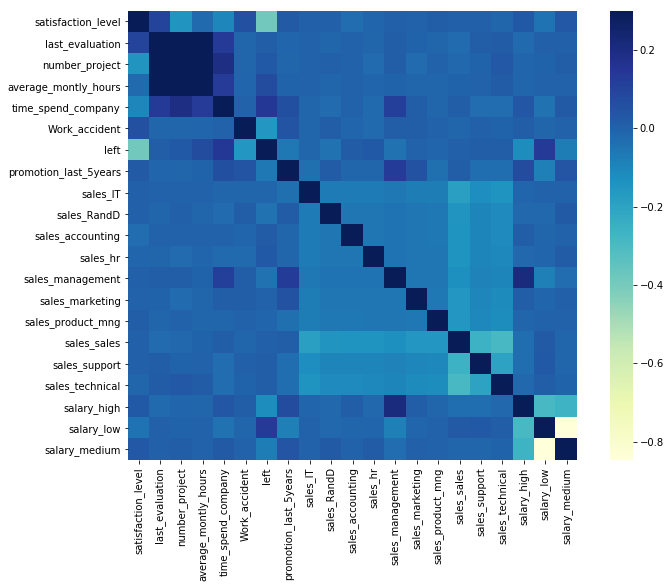

In [13]:
# heatmap for perason correlation
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=corr, vmax=.3, square=True, cmap="YlGnBu")

since the only highly correlated pair (correlation>0.8) is *salary_low_ and *salary_medium, we won't manipulate the dataframe

### Turnover(left) by Satisfaction_level

In [14]:
# create a subset
subset=df[['satisfaction_level','left']]

# convert data types
subset['left']=subset['left'].astype(object)
subset['satisfaction_level']=subset['satisfaction_level'].astype(object)

# count the number of observations for each satisfaction_level
rate_count_total=subset.groupby(['satisfaction_level'])['left'].count()
rate_count_total=rate_count_total.reset_index()
rate_count_total.columns=['satisfaction_level','total_number_observations']

# sum the number of "left" (left=1) for each satisfaction_level
rate_count_true=subset.groupby(['satisfaction_level'])['left'].sum()
rate_count_true=rate_count_true.reset_index()
rate_count_true.columns=['satisfaction_level_copy','count_of_left_true']
rate_count=pd.concat([rate_count_total,rate_count_true],axis=1)

# calcualte the number of "not-left" (left=0) for each satisfaction_level
rate_count['count_of_left_false']=rate_count['total_number_observations']-rate_count['count_of_left_true']
rate_count.drop(['satisfaction_level_copy'],axis=1,inplace=True)
rate_count.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,satisfaction_level,total_number_observations,count_of_left_true,count_of_left_false
0,0.09,177,177.0,0.0
1,0.10,332,332.0,0.0
2,0.11,300,300.0,0.0
3,0.12,27,4.0,23.0
4,0.13,50,3.0,47.0


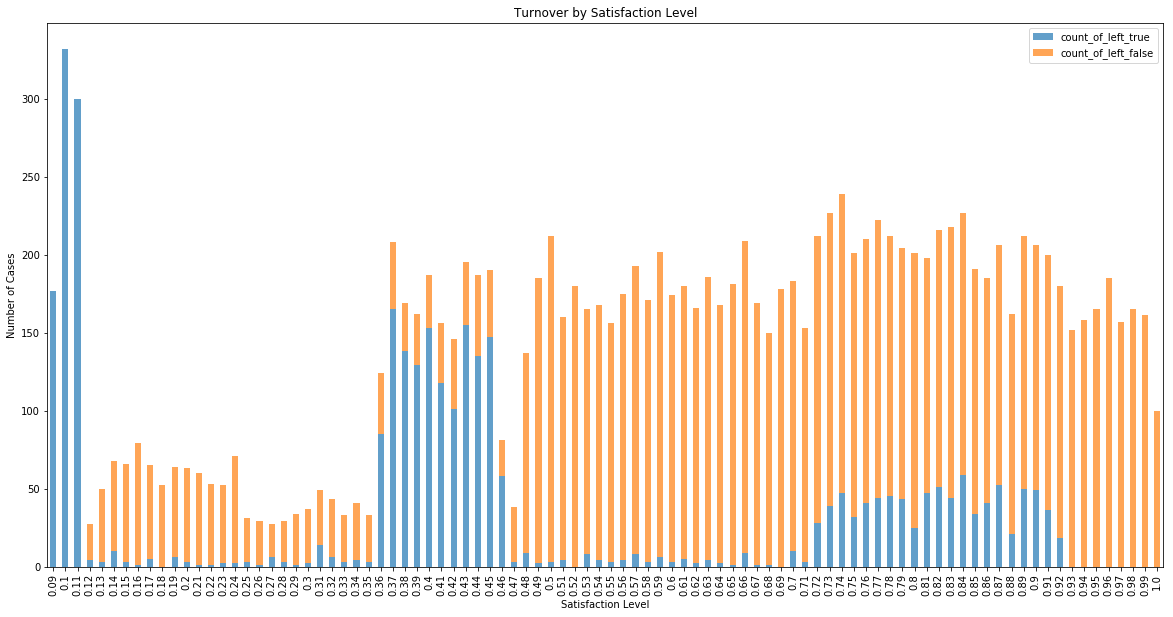

In [15]:
# stacked bar chart for turnover
import matplotlib.pyplot as plt
rate_count_subset=rate_count.drop(['total_number_observations'],axis=1)
rate_count_subset.plot(kind='bar',x='satisfaction_level',
                alpha=0.7,stacked=True,
             figsize=(20, 10))
plt.title("Turnover by Satisfaction Level")
plt.ylabel('Number of Cases')
plt.xlabel('Satisfaction Level')
plt.show()

In [16]:
# turnover rate for each satifaction_level
# create subset
subset=df[['satisfaction_level','left']]
# convert data types
subset['left']=subset['left'].astype(float)
subset['satisfaction_level']=subset['satisfaction_level'].astype(object)
# calculate percentage
rate=subset.groupby(['satisfaction_level'])['left'].mean()
rate=rate.reset_index()
rate

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,satisfaction_level,left
0,0.09,1.000000
1,0.10,1.000000
2,0.11,1.000000
3,0.12,0.148148
4,0.13,0.060000
5,0.14,0.147059
6,0.15,0.045455
7,0.16,0.012658
8,0.17,0.076923
9,0.18,0.000000


Text(0, 0.5, 'Turnover Rate')

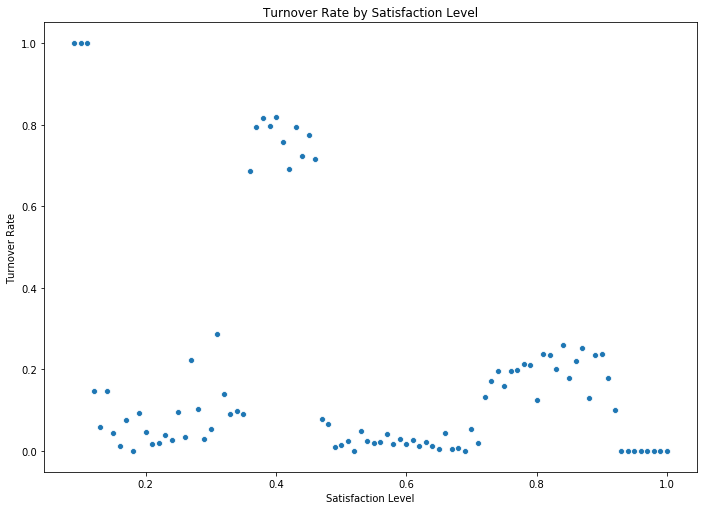

In [17]:
# scatter plot for turnover rate by satisfaction_level
a4_dims = (11.7, 8.27)
fig, ax1 = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x="satisfaction_level", y="left", data=rate,ax=ax1)
plt.title('Turnover Rate by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Turnover Rate')

## Random Forest Feature Importance

In [18]:
#scale variables
from sklearn import preprocessing
x=df.drop(['left'],axis=1)
x_scaled=preprocessing.scale(x)
x_scaled=pd.DataFrame(data=x_scaled,columns=x.columns)
y=df['left']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [19]:
# Feature importance using Mean Decrease Impurity
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 2000, random_state = 20)
rf.fit(x_scaled, y)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_scaled.columns), 
             reverse=True))

Features sorted by their score:
[(0.4982, 'satisfaction_level'), (0.1391, 'time_spend_company'), (0.1357, 'last_evaluation'), (0.1058, 'number_project'), (0.099, 'average_montly_hours'), (0.0033, 'sales_technical'), (0.0032, 'salary_low'), (0.0024, 'sales_support'), (0.0024, 'sales_sales'), (0.0021, 'salary_medium'), (0.0016, 'Work_accident'), (0.0015, 'sales_IT'), (0.0011, 'sales_accounting'), (0.001, 'salary_high'), (0.0009, 'sales_RandD'), (0.0007, 'sales_marketing'), (0.0007, 'sales_hr'), (0.0006, 'sales_product_mng'), (0.0006, 'sales_management'), (0.0002, 'promotion_last_5years')]


From the above result, we could get the list of top important features for turnover(left):
1. Satisfaction_level
2. Time_spend_company
3. Last_evaliation
4. Number_project
5. Average_monthly_hours

That's the end of this notebook. Thanks for reviewing.